<a href="https://colab.research.google.com/github/rafalsza/moje/blob/master/model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL **PREDICTION**

In [ ]:
!pip install yfinance
!pip install prophet

In [6]:
import matplotlib.pyplot as plt
import yfinance as yf
from fbprophet import Prophet
import pandas as pd
from fbprophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [34]:
symbol = 'btc-usd'
df = yf.download(symbol, start='2014-01-01')
print(df.head())
df = df.reset_index()
df[['ds', 'y']] = df[['Date', 'Adj Close']]

[*********************100%***********************]  1 of 1 completed
                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2014-09-17  465.864014  468.174011  ...  457.334015  21056800
2014-09-18  456.859985  456.859985  ...  424.440002  34483200
2014-09-19  424.102997  427.834991  ...  394.795990  37919700
2014-09-20  394.673004  423.295990  ...  408.903992  36863600
2014-09-21  408.084991  412.425995  ...  398.821014  26580100

[5 rows x 6 columns]


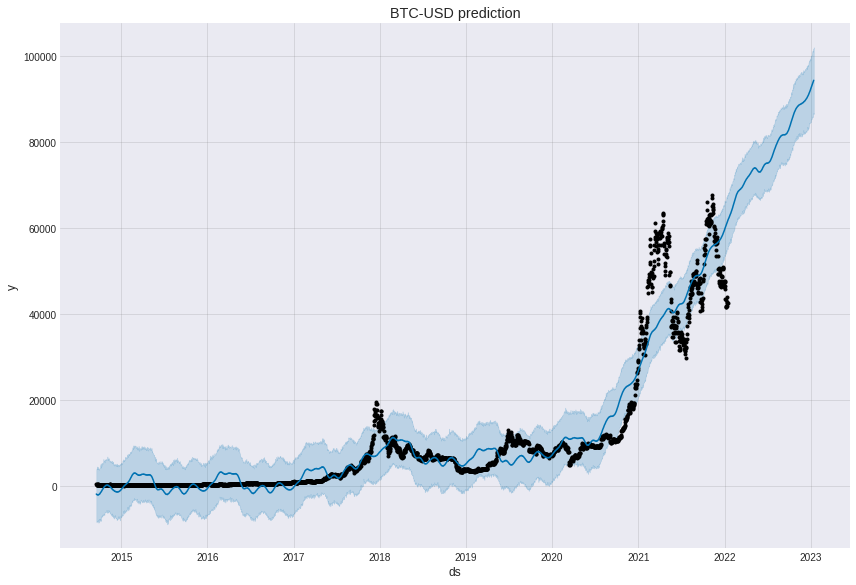

In [35]:
model = Prophet(daily_seasonality=True)
model.fit(df)
future = model.make_future_dataframe(365)
forecast = model.predict(future)
model.plot(forecast,figsize=(12,8))
plt.title(f'{symbol.upper()} prediction')
plt.style.use('seaborn-dark')

In [37]:
fig = plot_plotly(model, forecast, xlabel='date', ylabel='price')
fig.update_layout(template='ggplot2',title_text=f'{symbol.upper()} prediction')
fig.show()